# OBJETIVO

Crear un modelo que debe predecir la **categorización** de las propiedades entre baratas o caras, considerando como criterio el valor promedio de los precios (la media). 

In [1]:
# Cargar módulos

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None) # Mostrar todas las columnas

In [2]:
# Importar los datasets
df_propiedades_train = pd.read_csv('properties_colombia_train.csv', sep=',')
df_propiedades_test = pd.read_csv('properties_colombia_test.csv', sep=',')

- - - Crear la columna 'target'

In [3]:
# Creo la columna target para poder realizar la clasifiación pedida
# 1: caro, 0: barato

df_propiedades_train['target'] = np.where(df_propiedades_train['price'] > df_propiedades_train['price'].mean(),1,0)
df_propiedades_train.target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 197549 entries, 0 to 197548
Series name: target
Non-Null Count   Dtype
--------------   -----
197549 non-null  int32
dtypes: int32(1)
memory usage: 771.8 KB


# Etapa 1: EDA y Preprosesamiento de Datos

In [4]:
# Examinar los datos
df_propiedades_train.head(5)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,Medellín,El Poblado,NaN,NaN,NaN,4.0,4.0,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,3.0,2.0,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,NaN,NaN,2.0,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,Bucaramanga,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,Medellín,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0


In [5]:
df_propiedades_train.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,target
count,197549.000000,148051.000000,148051.000000,27537.000000,40525.000000,156467.000000,6974.000000,9.802000e+03,1.974860e+05,197549.000000
mean,497437.843851,5.666001,-75.041045,3.291208,3.239062,2.639279,1352.132349,9.483356e+02,6.436051e+08,0.234666
std,290023.578338,2.196804,1.104575,1.754795,1.985636,1.437174,7713.769352,3.730875e+04,1.944868e+09,0.423791
min,0.000000,-32.787342,-119.698190,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00,0.000000
25%,234211.000000,4.582315,-75.645126,3.000000,3.000000,2.000000,72.000000,7.100000e+01,2.000000e+08,0.000000
50%,507385.000000,4.908611,-75.476654,3.000000,3.000000,2.000000,120.000000,1.140000e+02,3.300000e+08,0.000000
75%,770037.000000,6.248101,-74.094001,4.000000,4.000000,3.000000,281.000000,2.160000e+02,6.000000e+08,0.000000
max,993551.000000,34.420334,-67.482570,40.000000,96.000000,20.000000,180000.000000,3.480000e+06,3.450000e+11,1.000000


In [6]:
df_propiedades_test.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,65850.000000,49433.000000,49433.000000,9110.000000,13403.000000,52054.000000,2314.000000,3.305000e+03
mean,500260.289263,5.686868,-75.042164,3.282327,3.236813,2.639624,1355.283924,5.616338e+03
std,290438.140244,2.217177,1.098202,1.702092,1.972357,1.426015,9409.882547,3.012933e+05
min,4.000000,-4.203165,-81.705052,1.000000,0.000000,1.000000,10.000000,1.000000e+00
25%,235030.500000,4.582000,-75.644727,3.000000,3.000000,2.000000,74.000000,7.100000e+01
50%,509299.500000,4.918677,-75.476071,3.000000,3.000000,2.000000,120.000000,1.150000e+02
75%,772024.500000,6.251822,-74.094765,4.000000,4.000000,3.000000,274.500000,2.130000e+02
max,993559.000000,13.338761,-67.924336,40.000000,60.000000,20.000000,200000.000000,1.732000e+07


In [7]:
df_propiedades_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

Descripción archivos provistos:

- properties_colombia_train.csv: Contiene 197549 registros y 27 dimensiones, el cual incluye la
información numérica del precio.

- propiedades_colombia_test.csv: Contiene 65850 registros y 25 dimensiones, el cual no incluye la
información del precio.

- A simple vista, podemos observar que los registros presentan una gran cantidad de valores faltantes, los cuales pueden deberse a una omisión al momento
    de completar el anuncio de la propiedad.

- Lat: la columna tiene un valor mínimo igual a -32.787342 y máximo de 34.420334, siendo la media igual 5.666001, eso valores no corresponden con Colombia.

- Lon: la columna tiene un valor mínimo igual a -119.698190 siendo que la media es -75.041045, eso indica que ese valor no es de Colombia.

### Clasificación de las variables

In [8]:
var_obj = (df_propiedades_train.dtypes == 'object') # indica True o False si cumple con la condición
name_obj = list(var_obj[var_obj].index)           # # Filtra var_obj dejando sólo los True, .index devuelve el nombre del elemnto     
print("Variables Categóricas:",'\n','Cantidad: ',len(name_obj),'    ','Nombre: ',name_obj)

var_int = (df_propiedades_train.dtypes == 'int_64')
name_int = list(var_int[var_int].index)
print("Variables Integer:",'\n','Cantidad: ',len(name_int),'    ','Nombre: ',name_int)

var_float = (df_propiedades_train.dtypes == 'float')
name_float = list(var_float[var_float].index)
print("Variables Float:",'\n','Cantidad: ',len(name_float),'    ','Nombre: ',name_float)

Variables Categóricas: 
 Cantidad:  18      Nombre:  ['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'currency', 'price_period', 'title', 'description', 'property_type', 'operation_type', 'geometry']
Variables Integer: 
 Cantidad:  0      Nombre:  []
Variables Float: 
 Cantidad:  8      Nombre:  ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']


### Detección de columnas no relevantes

Analizando que reperesenta cada variable y la relación que tiene con el objetivo del proyecto, se determina que varias de ellas no aportaran nada al desarrollo del modelo:

        (id, ad_type, start_date, end_date, created_on, l1, operation_type, price_period, title,description)

Hay que destacar que en columnas como 'title' y 'description' se presenta información de gran valor que puede utilizarse para completar valores faltantes o crear más categorías, pero sólo puede obtenerse con técnicas de NLP las cuales no serán aplicadas.

---

### 1- Registros duplicados

- - - Primero elimino las columnas 'id', 'start_date', 'end_date', 'created_on', debido a que una propiedad puede tener varios avisos.

In [9]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}

In [10]:
for key in dicc_df:
    dicc_df[key].drop(columns=['Unnamed: 0','id', 'ad_type', 'start_date', 'end_date', 'created_on'], inplace=True)

- - - Detección

In [11]:
# df_propiedades_train.duplicated.sum() ,otra manera de hacer lo mismo
for key in dicc_df:
    print(key,'  ','Cantidad Registros Duplicados: ','  ',len(dicc_df[key])-len(dicc_df[key].drop_duplicates()))

Train    Cantidad Registros Duplicados:     54927
Test    Cantidad Registros Duplicados:     13162


- - - Correción

In [12]:
# sólo elimino los duplicados del set de train
df_propiedades_train = df_propiedades_train.drop_duplicates()
print('Train: Cantidad Registros Duplicados: ','  ',len(df_propiedades_train)-len(df_propiedades_train.drop_duplicates()))

Train: Cantidad Registros Duplicados:     0


##### # Ahora puedo eliminar las columnas que no tendré en cuenta, ya que si primero hago esto y luego la detección de duplicados, voy a detectar una cantidad mayor de duplicados al restringir la cantidad de columnas de los registros.  

In [13]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}

for key in dicc_df:
    dicc_df[key].drop(columns=['l1', 'operation_type', 'price_period', 'title', 'description'], axis=1, inplace=True)

### Price

Antes de eliminar la columna, analizarla en busca de valores atípicos.

- - - Detección

In [14]:
# La divisa de 'price' no es única.
# 'price' contiene valores faltantes y 0. 
print('Currency: ',df_propiedades_train.currency.unique())
print('Cantidad de valores en USD: ',len(df_propiedades_train.currency[df_propiedades_train.currency=='USD']))
print('Cantidad de Nulos: ',len(df_propiedades_train.price[df_propiedades_train.price.isnull()]))
print('Cantidad de 0: ',len(df_propiedades_train.price[df_propiedades_train.price==0]))

Currency:  ['COP' nan 'USD']
Cantidad de valores en USD:  8
Cantidad de Nulos:  63
Cantidad de 0:  4


- - - Corrección

In [15]:
# Elimino los valores, debido a que son pocos registros lo resultados no se verán afectados.
f1 = df_propiedades_train.currency == 'USD'
f2 = df_propiedades_train.currency.isnull()
f3 = df_propiedades_train.currency == 0
df_propiedades_train.drop(df_propiedades_train.price[(f1 | f2 | f3)==True].index, inplace=True)

print('Currency: ',df_propiedades_train.currency.unique())
print('Cantidad de valores en USD: ',len(df_propiedades_train.currency[df_propiedades_train.currency=='USD']))
print('Cantidad de Nulos: ',len(df_propiedades_train.price[df_propiedades_train.price.isnull()]))
print('Cantidad de 0: ',len(df_propiedades_train.price[df_propiedades_train.price==0]))

Currency:  ['COP']
Cantidad de valores en USD:  0
Cantidad de Nulos:  0
Cantidad de 0:  0


In [16]:
# Elimino la columa 'price'
df_propiedades_train.drop('price',axis=1,inplace=True)

### Currency

Al tener sólo los registros en una única divisa, en este caso COP, no tiene sentido tener la columna 'currency'.

In [17]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}

for key in dicc_df:
    dicc_df[key].drop(columns=['currency'], axis=1, inplace=True)

---

### 2- VALORES ATÍPICOS

## lat

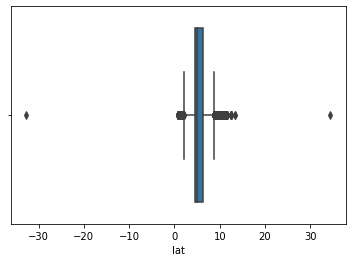

In [18]:
sns.boxplot(x = 'lat', data = df_propiedades_train);

In [19]:
Q1 = df_propiedades_train['lat'].quantile(0.25)
Q3 = df_propiedades_train['lat'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

4.595421356
6.2542829675
1.6588616114999999
2.1071289387500003
8.74257538475


In [20]:
print('mean: ',df_propiedades_train.lat.mean(),'\n','min: ',df_propiedades_train.lat.min(),'\n','max: ',df_propiedades_train.lat.max())

mean:  5.731341010158976 
 min:  -32.787342 
 max:  34.420334


## lon

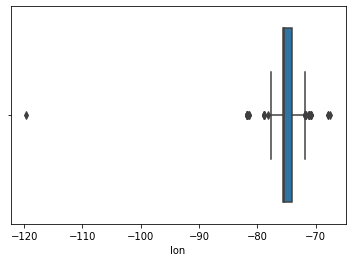

In [21]:
sns.boxplot(x = 'lon', data = df_propiedades_train);

In [22]:
Q1 = df_propiedades_train['lon'].quantile(0.25)
Q3 = df_propiedades_train['lon'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

-75.63070809999999
-74.094
1.5367080999999985
-77.93577024999999
-71.78893785


In [23]:
print('mean: ',df_propiedades_train.lon.mean(),'\n','min: ',df_propiedades_train.lon.min(),'\n','max: ',df_propiedades_train.lon.max())

mean:  -75.03073908369291 
 min:  -119.69819 
 max:  -67.4825696


- - - Visualización - Coordenadas

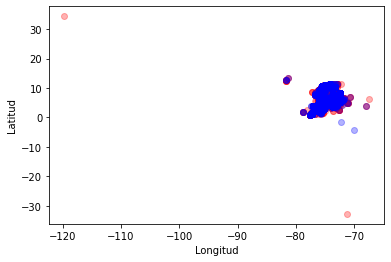

In [24]:
# La gráfica busca representar las coordenadas en un plano para poder detectar puntos fuera de Colombia

fig = plt.figure()
ax = plt.axes()
latitud = df_propiedades_train.lat
longitud = df_propiedades_train.lon

lat=df_propiedades_test.lat
lon = df_propiedades_test.lon
ax.scatter(longitud, latitud, label = 'Coordenadas Colombia',alpha = 0.3, color='r')
ax.scatter(lon, lat, label = 'Coordenadas Colombia',alpha = 0.3, color='b')
plt.xlabel('Longitud')
plt.ylabel('Latitud');

Se puede ver que algunos de los puntos se alejan de las zonas de mayor densidad, pero eso no indica que estén por fuera del territorio colombiano

- - - Corrección

Hay dos coordenadas que no corresponden al territorio, una es de una ubicación en Chile y la otra de Estados Unidos.

Aplico la media para la lat y lon según el l3 de cada registro y corrijo la coordenada para que esté dentro de Colombia

In [25]:
df_propiedades_train[df_propiedades_train.lat<-20]

,lat,lon,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,geometry,target
138682,-32.787342,-71.20732,Cundinamarca,La Calera,NaN,NaN,NaN,5.0,NaN,6.0,NaN,NaN,Casa,POINT (-71.20732 -32.787342),1


In [26]:
val_0 = -32.787342
val_mod = df_propiedades_train.lat[df_propiedades_train.l3=='La Calera'].mean()

df_propiedades_train = df_propiedades_train.replace([val_0],val_mod )

In [27]:
df_propiedades_train[df_propiedades_train.lon<-90]

,lat,lon,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,geometry,target
148562,34.420334,-119.69819,Cundinamarca,Bogotá D.C,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,Apartamento,POINT (-119.69819 34.420334),0


In [28]:
val_0_lon = -119.69819
val_0_lat = 34.420334

val_mod_lon = df_propiedades_train.lon[df_propiedades_train.l3=='Bogotá D.C'].mean()
val_mod_lat = df_propiedades_train.lat[df_propiedades_train.l3=='Bogotá D.C'].mean()

df_propiedades_train = df_propiedades_train.replace([val_0_lon,val_0_lat],[val_mod_lon,val_mod_lat] )

## rooms, bedrooms, bathrooms

Tener en cuenta que el dataset esta compuesto por un grupo muy variado de propiedades (casas, departamentos, hoteles, edificios, oficinas, fincas, lotes, bodegas, etc.)

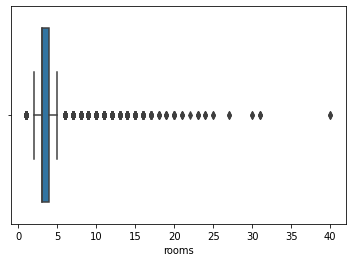

In [29]:
sns.boxplot(x = 'rooms', data = df_propiedades_train);

In [30]:
print('mean: ',df_propiedades_train.rooms.mean(),'\n','min: ',df_propiedades_train.rooms.min(),'\n','max: ',df_propiedades_train.rooms.max())

mean:  3.2871936613230144 
 min:  1.0 
 max:  40.0


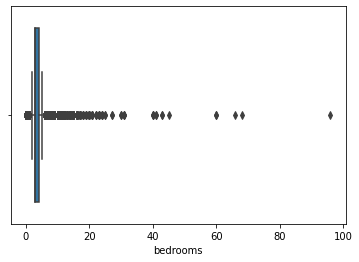

In [31]:
sns.boxplot(x = 'bedrooms', data = df_propiedades_train);

In [32]:
print('mean: ',df_propiedades_train.bedrooms.mean(),'\n','min: ',df_propiedades_train.bedrooms.min(),'\n','max: ',df_propiedades_train.bedrooms.max())

mean:  3.236698073126234 
 min:  0.0 
 max:  96.0


### surface_total, surface_covered

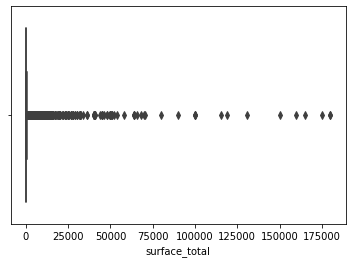

In [33]:
sns.boxplot(x = 'surface_total', data = df_propiedades_train);

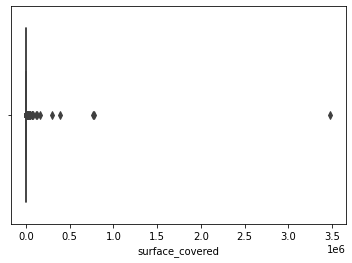

In [34]:
sns.boxplot(x = 'surface_covered', data = df_propiedades_train);

In [35]:
print('mean: ',df_propiedades_train.surface_covered.mean(),'\n','min: ',df_propiedades_train.surface_covered.min(),'\n','max: ',df_propiedades_train.surface_covered.max())

mean:  948.5299558113246 
 min:  1.0 
 max:  3480000.0


Algunos registros presentan valores muy bajos de superficie, se debe a que están mal imputados o representados en otra escalada. Decido dejarlos como están, porque no son demasiados.

-----

### 2- VALORES FALTANTES

- - - Detección

In [36]:
# Creo un dataframe para visualizar los datos faltantes en los sets de train y test

cantidad_faltante_train= dicc_df['Train'].isnull().sum()
cantidad_faltante_test= dicc_df['Test'].isnull().sum()

porcentaje_faltantes_train = round(dicc_df['Train'].isnull().sum()*100/dicc_df['Train'].shape[0],2)
porcentaje_faltantes_test = round(dicc_df['Test'].isnull().sum()*100/dicc_df['Test'].shape[0],2)

datos_faltantes = pd.concat([cantidad_faltante_train, porcentaje_faltantes_train,cantidad_faltante_test,porcentaje_faltantes_test], axis=1, keys=['total_Train', 'porcentaje_Train','total_Test', 'porcentaje_Test'])
datos_faltantes

,total_Train,porcentaje_Train,total_Test,porcentaje_Test
lat,18631,13.07,16417.0,24.93
lon,18631,13.07,16417.0,24.93
l2,0,0.00,0.0,0.00
l3,10293,7.22,3657.0,5.55
l4,103727,72.77,50776.0,77.11
l5,119455,83.80,56798.0,86.25
l6,136330,95.64,63486.0,96.41
rooms,115412,80.96,56740.0,86.17
bedrooms,102534,71.93,52447.0,79.65
bathrooms,35760,25.09,13796.0,20.95


Los dataframes presentan una gran cantidad de archivos faltantes, siendo en 7 columnas superior al 70%.

- - - Visualización 

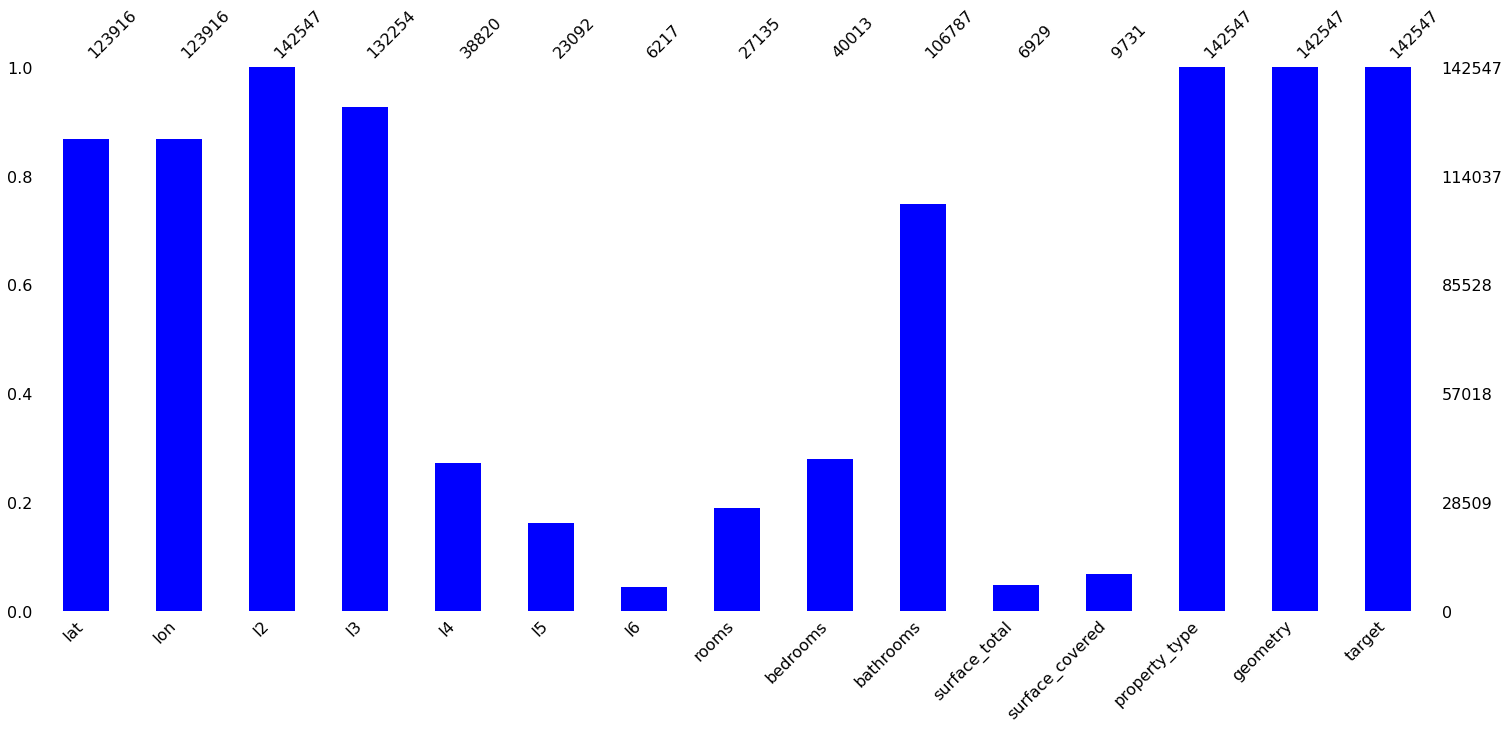

In [37]:
msno.bar(df_propiedades_train, color='blue');

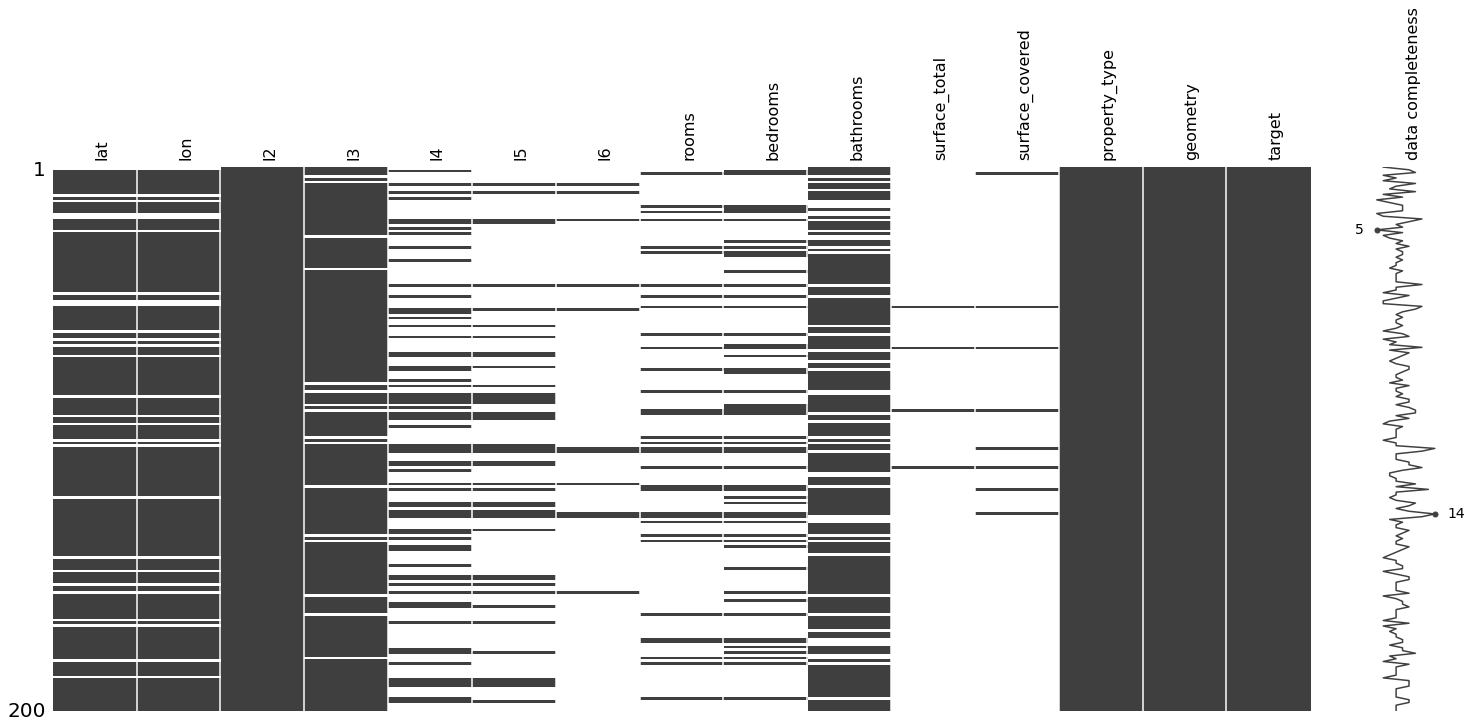

In [38]:
msno.matrix(df_propiedades_train.sample(200), labels = True, label_rotation = 90);

Por la cantidad de datos faltantes presentes en l4, l5 y l6 se eliminan dichas columnas, además la información que podrían entregar sería similar.

In [39]:
# Inspección lat-lot y geometry
# Geometry no presenta valores nulos, esto es debido a que en los registros donde faltan valores de lat y lon
# el valor de la coordenada anotado es "POINT EMPTY"
print('Geometry: ',(df_propiedades_train.geometry=='POINT EMPTY').sum())
print('lat-lon: ',(df_propiedades_train.lat.isnull()).sum())

Geometry:  18631
lat-lon:  18631


Se elimina la columna Geometry, porque contiene la misma información que las columnas lon y lat

In [40]:
# Elimino: l4,l5,l6 y geometry
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}

for key in dicc_df:
    dicc_df[key].drop(columns=['l4', 'l5', 'l6', 'geometry'], axis=1, inplace=True)

---

### 3- IMPUTACIÓN DE VALORES FALTANTES

La estrategia que tome para imputar estos valores es filtrar cada categoría por target y property_type, de manera tal que los valores con los que se completen los registros tengan cierta lógica con lo que representan.

In [41]:
df_propiedades_test.columns

Index(['lat', 'lon', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'property_type'],
      dtype='object')

### lat

In [42]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].lat.replace(np.nan,df_propiedades_train.lat[(t==1) & (p==e)].median(), inplace=True)

dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].lat.replace(np.nan,df_propiedades_train.lat[(t==0) & (p==e)].median(), inplace=True)

### lon

In [43]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].lon.replace(np.nan,df_propiedades_train.lon[(t==1) & (p==e)].median(), inplace=True)

dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].lon.replace(np.nan,df_propiedades_train.lon[(t==0) & (p==e)].median(), inplace=True)

### rooms

In [44]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].rooms.replace(np.nan,df_propiedades_train.rooms[(t==1) & (p==e)].median(), inplace=True)

dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].rooms.replace(np.nan,df_propiedades_train.rooms[(t==0) & (p==e)].median(), inplace=True)

### bedrooms

In [45]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].bedrooms.replace(np.nan,df_propiedades_train.bedrooms[(t==1) & (p==e)].median(), inplace=True)

dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].bedrooms.replace(np.nan,df_propiedades_train.bedrooms[(t==0) & (p==e)].median(), inplace=True)

### bathrooms

In [46]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].bathrooms.replace(np.nan,df_propiedades_train.bathrooms[(t==1) & (p==e)].median(), inplace=True)

dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].bathrooms.replace(np.nan,df_propiedades_train.bathrooms[(t==0) & (p==e)].median(), inplace=True)

### surface_total

In [47]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].surface_total.replace(np.nan,df_propiedades_train.surface_total[(t==1) & (p==e)].median(), inplace=True)

dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].surface_total.replace(np.nan,df_propiedades_train.surface_total[(t==0) & (p==e)].median(), inplace=True)

### surface_covered

In [48]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].surface_covered.replace(np.nan,df_propiedades_train.surface_covered[(t==1) & (p==e)].median(), inplace=True)

dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    t = df_propiedades_train.target
    p = df_propiedades_train.property_type
    p_type = df_propiedades_train.property_type.unique()
    for e in p_type: 
        dicc_df[key].surface_covered.replace(np.nan,df_propiedades_train.surface_covered[(t==0) & (p==e)].median(), inplace=True)

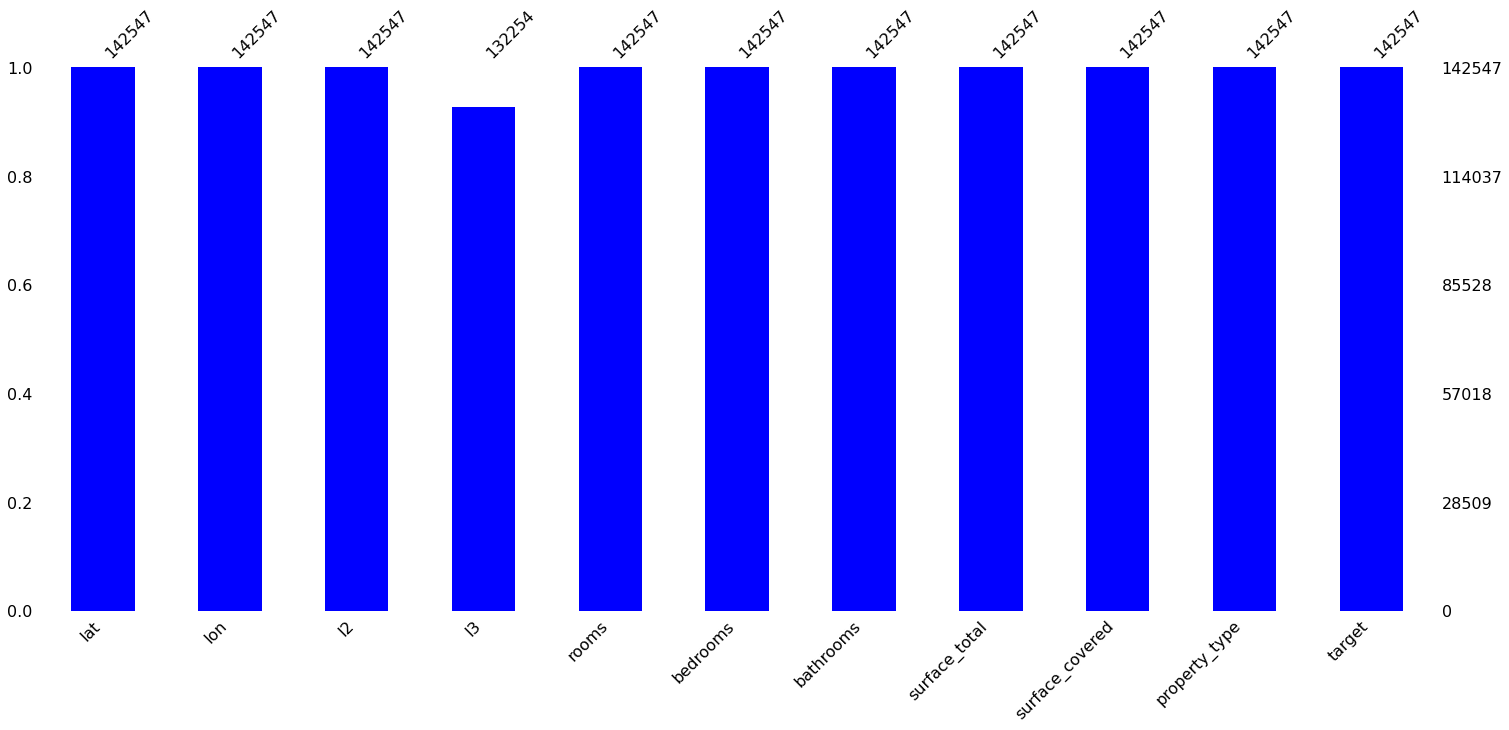

In [49]:
msno.bar(df_propiedades_train, color='blue');

---

### 4- Análisis Variables Cuantitativas

- - - Visualización

<AxesSubplot:>

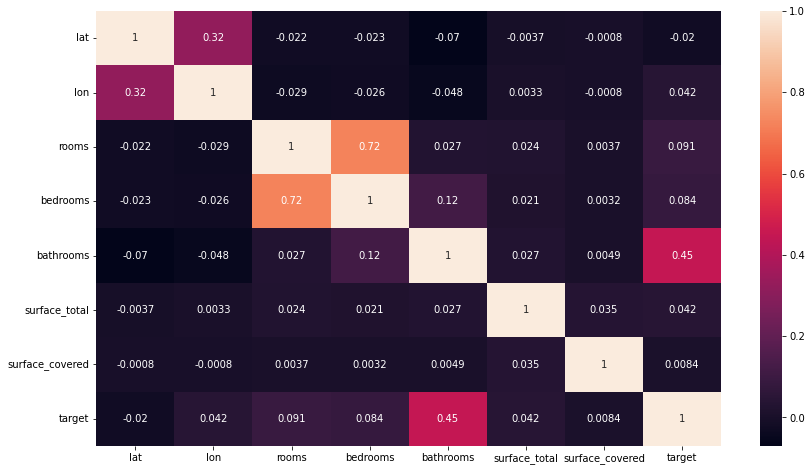

In [51]:
plt.figure(figsize=(14,8))
corr = df_propiedades_train.corr()
sns.heatmap(corr,
        xticklabels= corr.columns, 
        yticklabels= corr.columns,
        annot=True)

Las variables son independientes, no se evidencia relación lineal entre ellas.

La correlación con la variable objetivo se aproxima a cero, lo cual no es un buen indicador.

---

### 5- CODIFICACIÓN DE VARIABLES CATEGÓRICAS

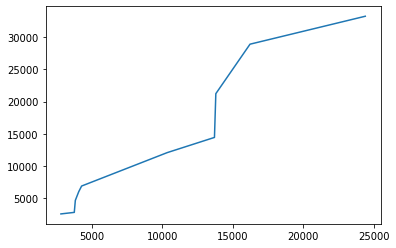

In [52]:
# Comparo los primeros registros de l2 y l3. Cómo es de esperar presentan una relación lineal alta
x = df_propiedades_train.l3.value_counts()[0:10]
y = df_propiedades_train.l2.value_counts()[0:10]
plt.plot(x,y)

In [53]:
# Elimino la columna 'l3', debido a su alta linealidad con l2 y su gran cantidad de categorías.
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}
for key in dicc_df:
    dicc_df[key].drop(columns=['l3'], axis=1, inplace=True)

In [54]:
# codificación de variables del set de Train
dummies_Train = pd.get_dummies(df_propiedades_train[['l2','property_type']], prefix=['l2','property_type'])
df_propiedades_train = df_propiedades_train.join(dummies_Train)

# codificación de variables del set de Test
dummies_Test = pd.get_dummies(df_propiedades_test[['l2','property_type']], prefix=['l2','property_type'])
df_propiedades_test = df_propiedades_test.join(dummies_Test)

In [55]:
# Verifico no tener inconsistencias en los 2 sets, para no encontrarme con problemas más adelante

dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}

cantidad_faltante_train= dicc_df['Train'].isnull().sum()
cantidad_faltante_test= dicc_df['Test'].isnull().sum()

porcentaje_faltantes_train = round(dicc_df['Train'].isnull().sum()*100/dicc_df['Train'].shape[0],2)
porcentaje_faltantes_test = round(dicc_df['Test'].isnull().sum()*100/dicc_df['Test'].shape[0],2)

datos_faltantes = pd.concat([cantidad_faltante_train, porcentaje_faltantes_train,cantidad_faltante_test,porcentaje_faltantes_test], axis=1, keys=['total_Train', 'porcentaje_Train','total_Test', 'porcentaje_Test'])
datos_faltantes

,total_Train,porcentaje_Train,total_Test,porcentaje_Test
lat,0,0.0,0.0,0.0
lon,0,0.0,0.0,0.0
l2,0,0.0,0.0,0.0
rooms,0,0.0,0.0,0.0
bedrooms,0,0.0,0.0,0.0
bathrooms,0,0.0,0.0,0.0
surface_total,0,0.0,0.0,0.0
surface_covered,0,0.0,0.0,0.0
property_type,0,0.0,0.0,0.0
target,0,0.0,NaN,NaN


- - - Eliminar columna 'l2' y 'property_type' 

In [56]:
dicc_df = {'Train':df_propiedades_train, 'Test':df_propiedades_test}

for key in dicc_df:
    dicc_df[key].drop(columns=(['l2','property_type']),inplace=True)

- - - Verifico la correlación de las nuevas columnas

<AxesSubplot:>

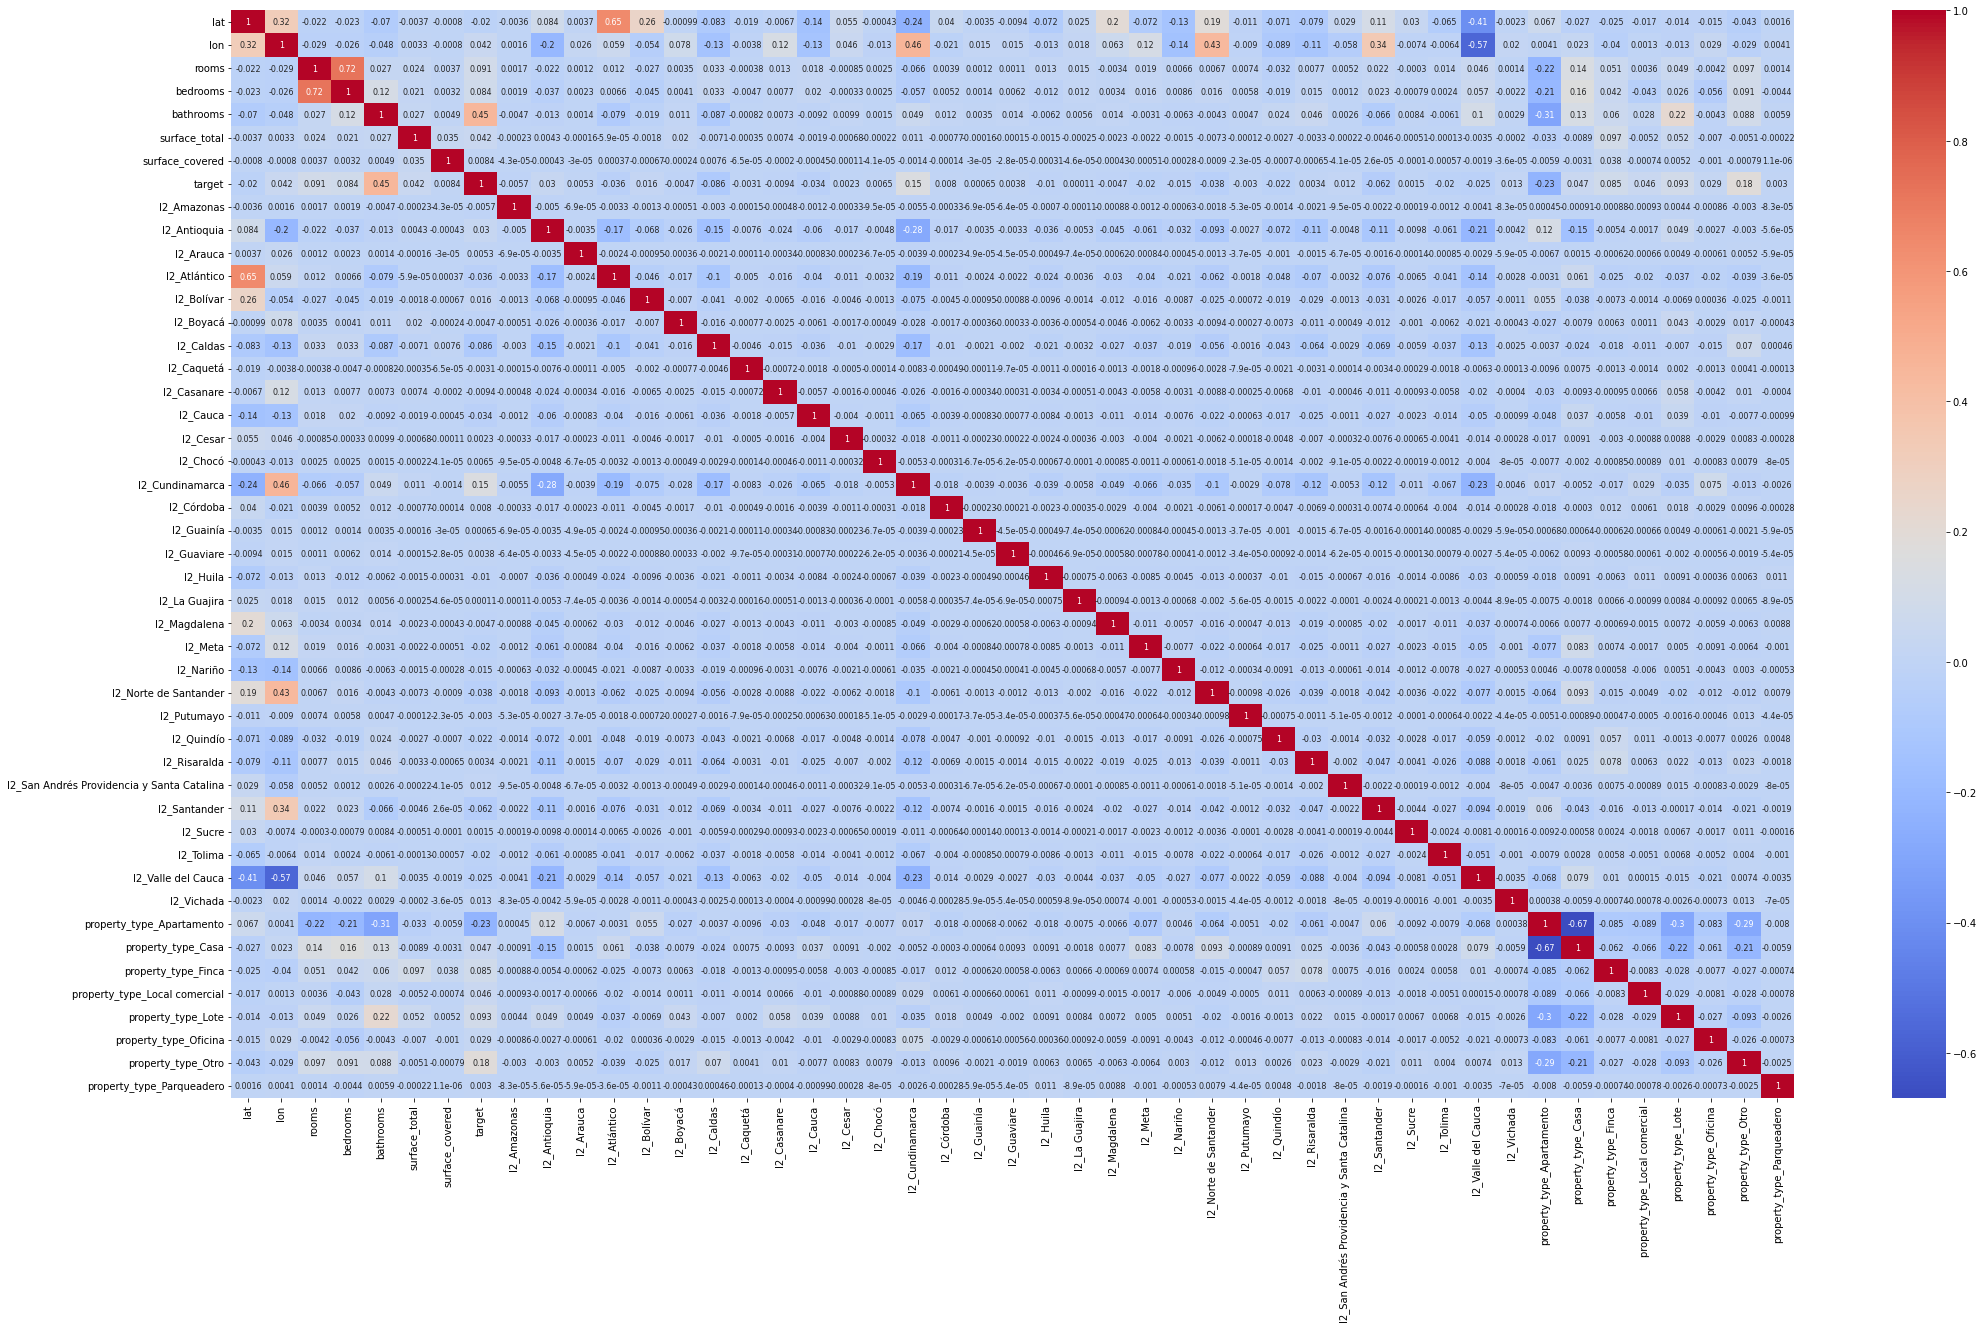

In [57]:
plt.figure(figsize=(35,20))
corr = df_propiedades_train.corr()
sns.heatmap(corr,
        xticklabels= corr.columns, 
        yticklabels= corr.columns,
        annot=True,
        annot_kws={'size': 8},
        cmap= 'coolwarm')

---

---

---

## Etapa 2: Resolución del problema

#### --Nota: al estandarizar las variables los resultados empeoraron

### 5- RANDOM FOREST

In [58]:
X = df_propiedades_train.drop('target',axis=1)
y = df_propiedades_train.target

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from IPython.display import clear_output

In [60]:
# Separamos nuestros datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [61]:
# Instanciamos el modelo

clf = RandomForestClassifier(n_estimators=100,max_depth=4, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_jobs=-1, oob_score=True, random_state=42)

In [62]:
# Evaluación del modelo

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
print(recall_score(y_train, y_train_pred))
print(recall_score(y_test, y_test_pred))

0.7658654647175916
0.765555945282357
0.0551847224701053
0.05311250713877784


In [67]:
clf.oob_score_ # determina que tanto afecta la separación de columnas 
               # para la evaluación del modelo en el resultado final
               # si es muy alto, indica que una de las variables es superior a otras

0.766566991415067

### --- Identificar características importantes

In [64]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": clf.feature_importances_}
).sort_values("importance", ascending=False)

La siguiente gráfica muestra la importancia relativa de las características y su contribución al modelo.

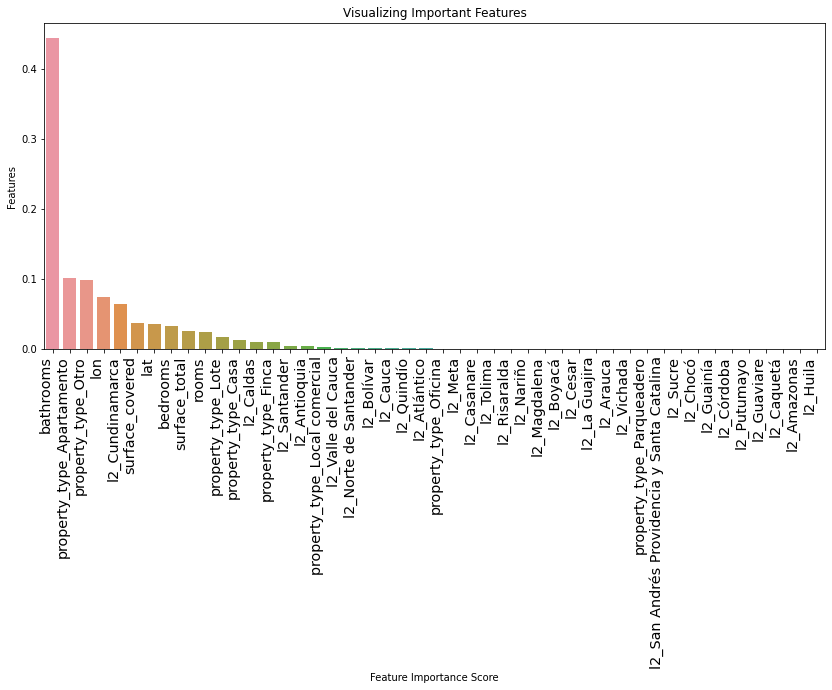

In [65]:
# visualizarcaracterísticas importantes
fig = plt.figure(figsize=(14, 6))
# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=90, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

## --- Optimización de Hiperparámetros

Reduzco las características a utilizar a las primeras 18

In [66]:
# cargar datos con características seleccionadas
X = df_propiedades_train[['bathrooms','lon','lat','property_type_Apartamento','property_type_Otro',
 'surface_covered','rooms','l2_Cundinamarca','bedrooms','surface_total','property_type_Casa','property_type_Lote',
 'l2_Antioquia','l2_Caldas','property_type_Finca','l2_Valle del Cauca','l2_Norte de Santander','l2_Santander']]
y = df_propiedades_train.target

# dividir en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42)

### Determinar la mejor cantidad de árboles a usar por Random Forest

In [ ]:
train_accuracy = []
test_accuracy = []
oob_scores = []
recall_scores = []

N_estimadores = [2,50,100,150,200,250,300]
i = 0
i_max = len(N_estimadores)
for estimadores in N_estimadores:
    i = i + 1
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

Completado: 100.0%


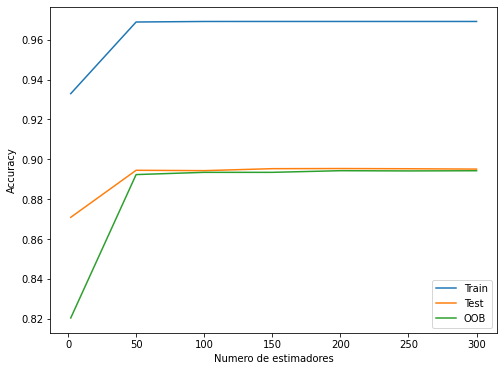

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend();

### Determinar la profundidad de los árboles

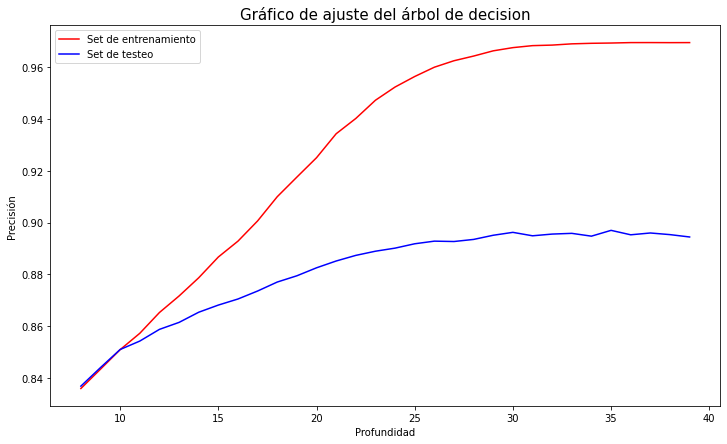

In [ ]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(8, 40))

for deep in max_deep_list:
    clf = RandomForestClassifier(max_depth=deep, criterion='entropy')
    clf.fit(X_train, y_train)
    train_prec.append(clf.score(X_train, y_train))
    eval_prec.append(clf.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Profundidad')
plt.show()

### Instanciar el modelo con los nuevos parámetros

In [68]:
clf = RandomForestClassifier(n_estimators=50,max_depth=14, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [69]:
# Evaluación del modelo

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print('Accuracy_Train: ',accuracy_score(y_train, y_train_pred))
print('Accuracy_Test: ',accuracy_score(y_test, y_test_pred))
print('Recall_Train: ',recall_score(y_train, y_train_pred))
print('Recall_Test: ',recall_score(y_test, y_test_pred))

Accuracy_Train:  0.882003209484641
Accuracy_Test:  0.865135040336724
Recall_Train:  0.6738175977155095
Recall_Test:  0.6407766990291263


In [70]:
matrix = confusion_matrix(y_test, y_test_pred)

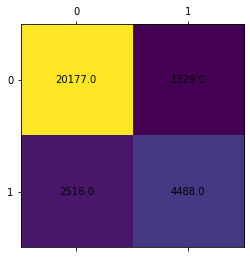

In [71]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center');

In [72]:
# Reporte de Clasificacion
report = classification_report(y_test, y_test_pred)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     21506
           1       0.77      0.64      0.70      7004

    accuracy                           0.87     28510
   macro avg       0.83      0.79      0.81     28510
weighted avg       0.86      0.87      0.86     28510



### --- Observaciones

#### El modelo falla en gran medida al tener que clasificar propiedades caras.

---

---

### 7- Evaluar con el df_propiedades_test

In [ ]:
df_propiedades_test = df_propiedades_test[['bathrooms','lon','lat','property_type_Apartamento','property_type_Otro',
 'surface_covered','rooms','l2_Cundinamarca','bedrooms','surface_total','property_type_Casa','property_type_Lote',
 'l2_Antioquia','l2_Caldas','property_type_Finca','l2_Valle del Cauca','l2_Norte de Santander','l2_Santander']]

In [ ]:
rf_pred = clf.predict(df_propiedades_test)

In [ ]:
rf_pred = pd.DataFrame({'pred':rf_pred})
rf_pred.pred.unique()

array([1, 0])

In [ ]:
rf_pred.pred.value_counts()

0    53358
1    12492
Name: pred, dtype: int64

In [ ]:
rf_pred.to_csv('BSLuciano_.csv',index=False)